# Линейная алгебра. Лабораторная работа 1, осень 2024



В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [2]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [2]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`.

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;  
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;  
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.2 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [6]:
#Number 1
Z = np.zeros((3, 4))
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [35]:
#Number 2
A = np.diag(np.arange(1, 6))
print(A)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [36]:
#Number 3
print(A.trace())

15


In [44]:
#Number 4
print(np.linalg.inv(A))

[[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]


In [64]:
#Number 5
X = np.random.rand(4, 5)
X

array([[0.76029416, 0.10620378, 0.00312222, 0.50975934, 0.81463928],
       [0.88503158, 0.02890844, 0.69862141, 0.9137776 , 0.31159529],
       [0.73665932, 0.45732687, 0.55413432, 0.38577043, 0.17502159],
       [0.2476044 , 0.31852716, 0.70581385, 0.18638389, 0.93989711]])

In [65]:
#Number 6
minor = X[np.ix_([2-1, 3-1], [1-1, 2-1])]
print(np.linalg.det(minor))

0.38345305713008165


In [66]:
#Number 7
print(X.T@X)

[[1.965303   0.52209382 1.20364663 1.52661994 1.25679111]
 [0.52209382 0.32272236 0.49876904 0.31634577 0.47495034]
 [1.20364663 0.49876904 1.29331965 0.98529714 0.98060849]
 [1.52661994 0.31634577 0.98529714 1.27840186 0.94269861]
 [1.25679111 0.47495034 0.98060849 0.94269861 1.67476793]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [1 балл]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [123]:
def my_det(X):
    '''
    Parameters
    ----------
    X : array_like

    Returns
    -------
    det : float
        Determinant of `a`.
    '''
    if X.shape[0] != X.shape[1]:
        raise ValueError

    local_X = X.copy()
    local_X = np.array(local_X, dtype = np.float128)

    pointer = 0
    det = 1
    swapped = 0
    while pointer < local_X.shape[0]:

        if local_X[pointer][pointer] == 0.0:
            swapped = 0

            for i in range(pointer+1, local_X.shape[0]):
                if local_X[i][pointer] != 0:
                    elem_1, elem_2 = local_X[i].copy(), local_X[pointer].copy()
                    local_X[pointer], local_X[i] = elem_1, elem_2
                    det *= -1.0
                    swapped = 1

            if not swapped:
                return 0

        inversed = 1 / local_X[pointer][pointer]
        det *= 1 / inversed
        local_X[pointer] *= inversed

        for i in range(pointer+1, local_X.shape[0]):
            local_X[i] -= local_X[pointer] * local_X[i][pointer]
        pointer += 1

    return det


Простая проверка:

In [124]:
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [125]:
for _ in range(50):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')
    print(my_det(X))

329956.72686319944103
-112787.816148252635315
-4610038.0577511973243
22935.38125260605268
-391526.4260535547594
-12501854.438772743163
1729769.4883526492018
358928.58980149131816
-23705.91952192710788
-148884.66729025539385
39975.584312978193314
-230843.23390108552522
-414818.62174195403117
330375.35327712821208
209106.27903892141505
-166244.91919190907541
-674207.3032225735169
662729.9942101122581
285760.82733958990715
1070464.310685902033
32976.506905477955588
326667.76965107259295
-1481973.9243141466835
-102165.78660629710444
-394877.20134329718434
1184798.7813749680738
786754.03996269406736
113589.488464669624
616577.2361956953777
302681.52384253622054
-14734.033698710181595
264178.61780670145288
166142.61333182084091
-316040.72126390913883
-133928.16982818324753
-38981.704111053926702
-18473.686220059931712
10596.245562012008516
368904.89279809863964
-1471323.3247203665763
-22367.765588498608887
-66710.564379636173605
182969.37119660362637
-667433.6861956933428
918206.616153998856

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

17.2 µs ± 2.23 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
227 µs ± 45.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
131 µs ± 35.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
19.3 ms ± 3.84 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
37 ms ± 1.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.35 s ± 464 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


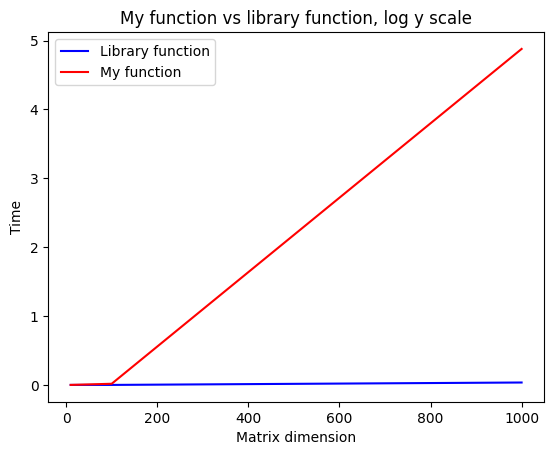

In [126]:
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

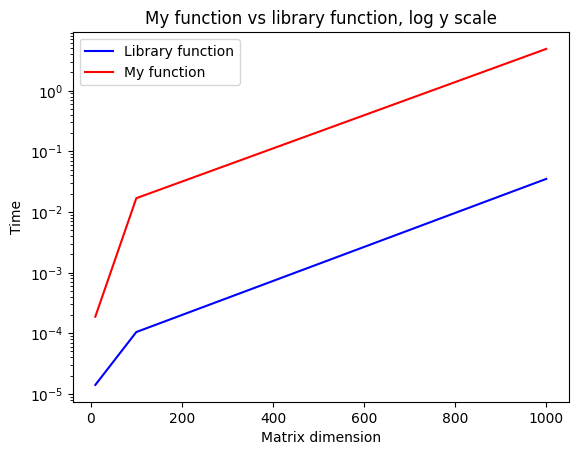

In [127]:
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью.

**Задание 3.1 [0.6 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [147]:
x1 = np.array([[1, 0], [10**20, 1]])
y1 = np.array([[10**(-20), 1], [0, 1 -10**20]])

x2 = np.array([[1., 0.], [10.**20, 1.]])
y2 = np.array([[10.**(-20), 1.], [0., 1. -10.**20]])

print(x1@y1)
print('-'*30)
print(x2@y2)

#Excpected answer:
#[[10**(-20) 1]
# [1 1]]

[[1e-20 1]
 [1.0 1]]
------------------------------
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Первый, т. е.:**

$$
\begin{pmatrix}
10^{-20} & 1\\
1 & 1
\end{pmatrix}
$$

Это связано с тем, как Python работает с вещественными числами (так как во float хранится до 16 знаков после запятой, при действиях с числами $1$ и $10^{20}$ единица теряется)

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [210]:
def my_pascal(dim):
    P = np.zeros((dim, dim))
    P[:, 0] = P[0,: ] = np.array([1] * dim)
    for i in range(1, dim):
        for j in range(1, dim):
            P[i][j] = P[i-1][j] + P[i][j-1]
    return P.astype(int)
print(my_pascal(10))

[[    1     1     1     1     1     1     1     1     1     1]
 [    1     2     3     4     5     6     7     8     9    10]
 [    1     3     6    10    15    21    28    36    45    55]
 [    1     4    10    20    35    56    84   120   165   220]
 [    1     5    15    35    70   126   210   330   495   715]
 [    1     6    21    56   126   252   462   792  1287  2002]
 [    1     7    28    84   210   462   924  1716  3003  5005]
 [    1     8    36   120   330   792  1716  3432  6435 11440]
 [    1     9    45   165   495  1287  3003  6435 12870 24310]
 [    1    10    55   220   715  2002  5005 11440 24310 48620]]


Чему равен её определитель? **Строго** поясните свой ответ.

----
Заметим, что используя лишь элементарные преобразования 1 вида (например, на $1$ итерации вычитая из каждой $i-$й строки (кроме первой) строку с номером $i-1$ (снизу вверх), на $2-$й аналогично, но идем по строкам, где $i \ge 2$ и т. д.) мы приводим матрицу к виду верхнетреугольной и получаем, что на её диагонали будут стоять единицы (из элемента на главной диагонали на $i-$й строке будет вычтено число $i-1$ после всех преобразований, отсюда и берется единица). Получаем, что определитель верхнетреугольной матрицы равен 1, как произведение элементов на главной диагонали.

**Ответ: 1**

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [225]:
pascal = my_pascal(30)
print(sla.det(pascal))

-3.400444993542751e+51


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [4]:
def prod_and_sq_sum(A):
    diag = np.diagonal(A)
    prod = np.prod(diag)
    sq_sum = sum(diag * diag)
    print(diag)
    return prod, sq_sum

#test

np.random.seed(42)
for _ in range(2):
    X = np.random.rand(3, 3)
    print(X)
    print(prod_and_sq_sum(X))
    print('-'*30)

[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]]
[0.37454012 0.15601864 0.60111501]
(0.03512630005919477, 0.5259613741347408)
------------------------------
[[0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643]]
[0.70807258 0.21233911 0.52475643]
(0.07889791739926318, 0.8218239858897776)
------------------------------


**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [27]:
def f(A, B, lmbd, k):
    m, n = A.shape[0], A.shape[1]
    new_A = A[:, :min(k, n)]
    new_B = B[:, :min(k, m)].T
    new_lmbd = lmbd[:min(k, n)]
    lmbd_A = new_lmbd * new_A
    res = lmbd_A.dot(new_B)
    return res

#test
np.random.seed(42)
A = np.random.rand(3, 4)
B = np.random.rand(3, 4)
lmbd = np.array([3, 5, 6, 2])

print(f(A, B, lmbd, 2))

[[1.94471865 2.83632001 1.35058441]
 [0.5552484  0.55169802 0.39518276]
 [2.25293881 2.40648193 1.59724077]]


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком.

In [26]:
def get_diag(A, B):
    res = np.einsum('ij, ji -> i', A, B)
    return res

np.random.seed(42)
X = np.random.rand(3, 3)
Y = np.random.rand(3, 3)
print(X@Y)
print('-'*30)
print(get_diag(X, Y))
#Всё работает!

[[1.19086771 0.43228703 0.92025228]
 [0.58238032 0.09291206 0.69087197]
 [0.87241658 0.36800327 0.52926729]]
------------------------------
[1.19086771 0.09291206 0.52926729]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.5 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.5 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.5 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [58]:
def shrink_rotate(x, a, coef=1., angle=0.):
    vector = x - a
    transformed = a + vector * coef * np.exp(1j * angle)
    return transformed

def shrink_rotate_conj(x, a, coef=1., angle=0.):
    return a + (shrink_rotate(x, a, coef=1., angle=0.) - a).conjugate()

def geometric_inverse(x, a, r):
    res = a + (r ** 2 * (x - a)) / ((x - a) ** 2 )
    return res

**Задание 5.4 [0.75 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

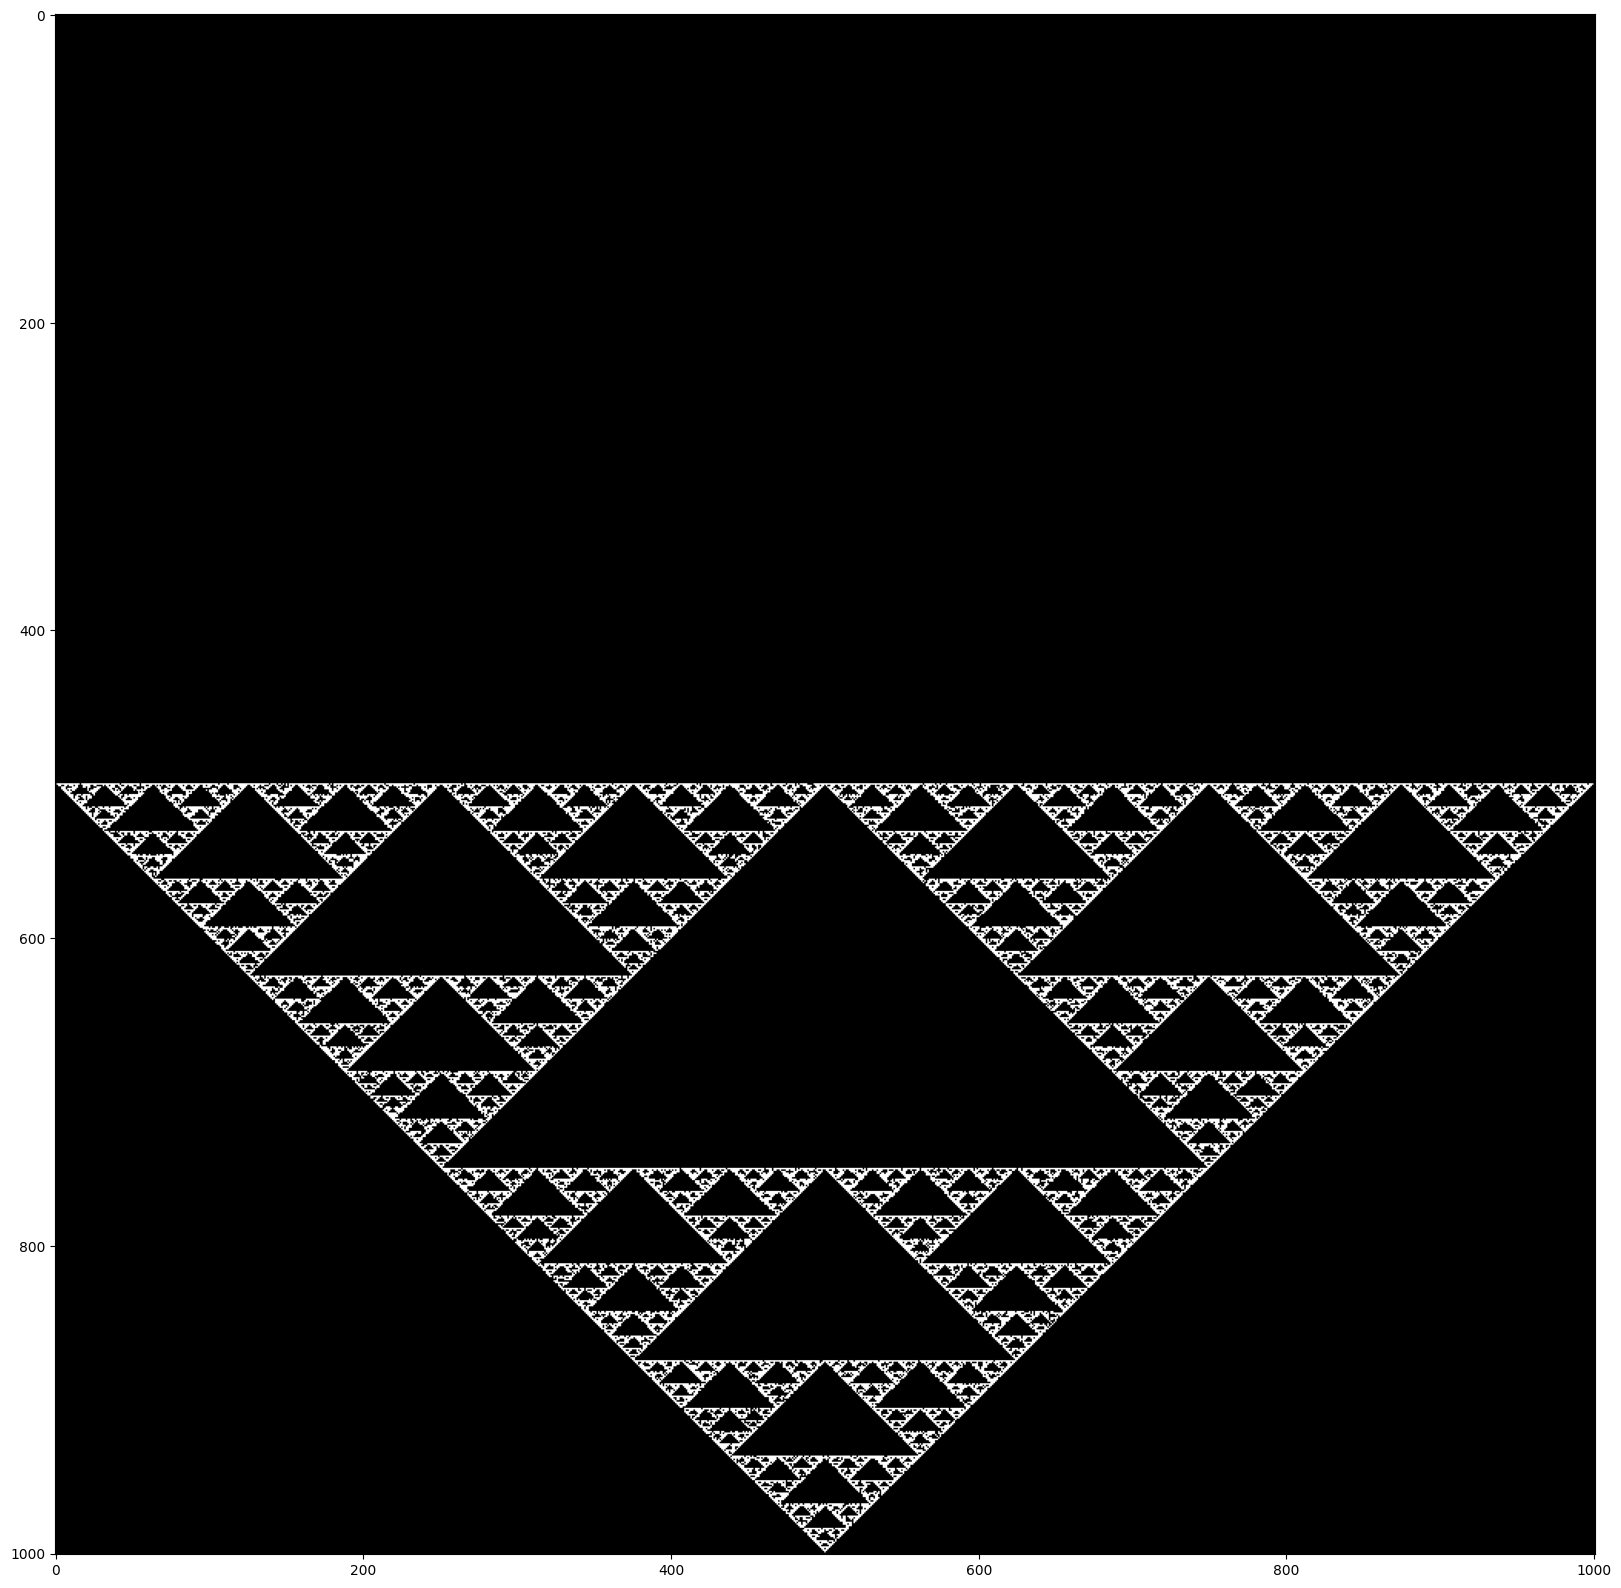

In [50]:
z = 0.5 + 0.*1j
max_iter = 100000
image = np.zeros((1001, 1001))
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(1, max_iter+1):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 9:
        x, y = int(z.real * 500) + 500, int(z.imag * 500) + 500
        image[y, x] = 1

plt.figure(figsize=(20, 20))
plt.imshow(image, cmap='gray')


**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

---
Полученный фрактал -- Треугольник Серпинского. Получается именно он, так как на каждой итерации равносторонний треугольник рекурсивно делится на множество меньших равносторонних треугольников засчёт сжатия и перемещения точки к одной из вершин

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

Мне нравится следующий фрактал: он похож на Инь-Янь

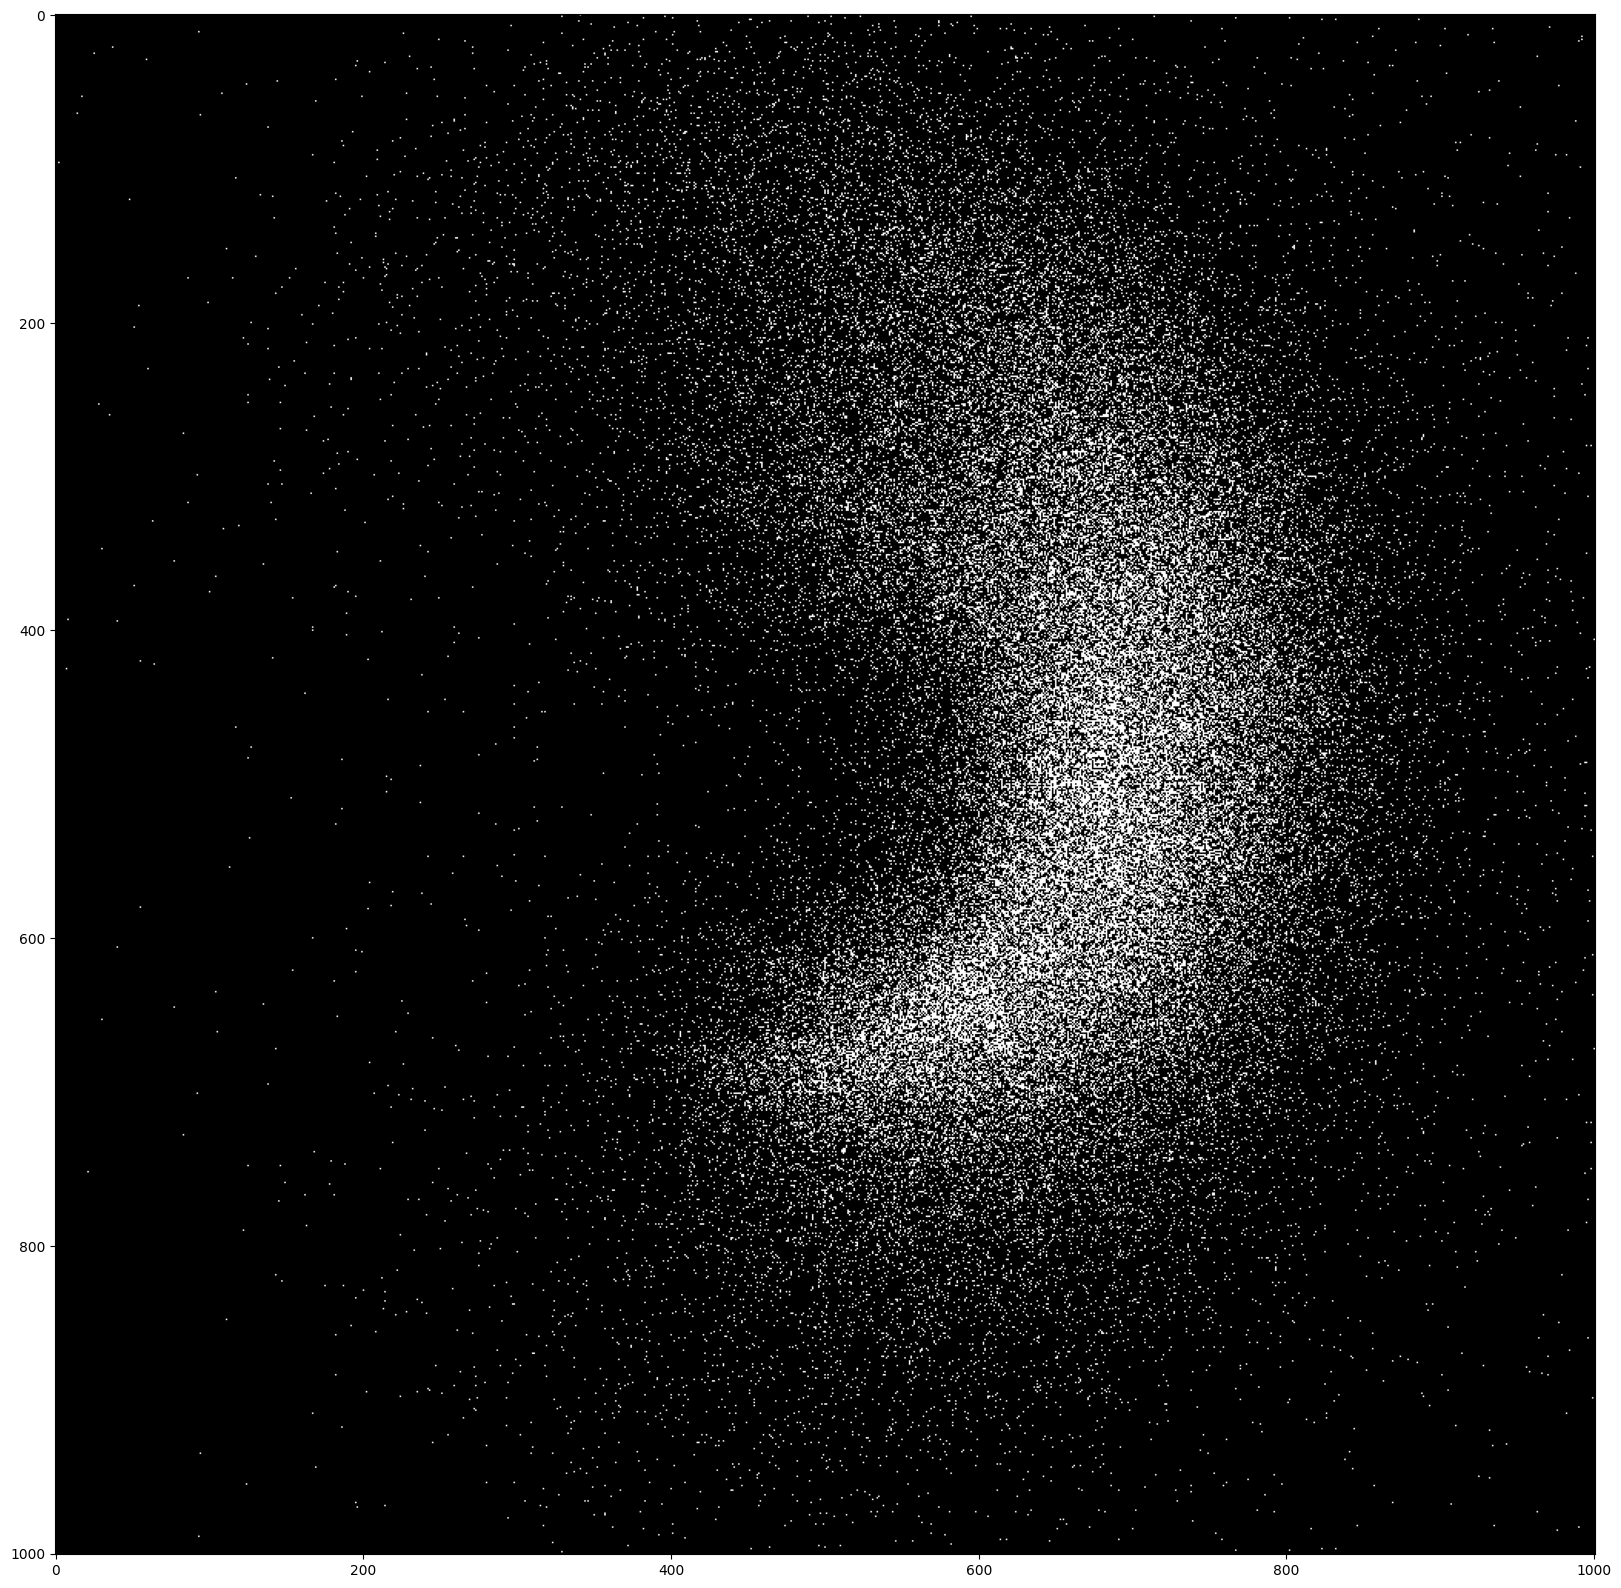

In [77]:
z = 0.5 + 0.*1j
max_iter = 100000
image = np.zeros((1001, 1001))

funcs = [
    lambda t: shrink_rotate(t, 0.2 + 0.2j, coef=0.8, angle=np.pi / 8),
    lambda t: shrink_rotate(t, -0.3 - 0.3j, coef=0.9, angle=-np.pi / 6),
    lambda t: shrink_rotate_conj(t, 0.0 + 0j, coef=0.7, angle=np.pi / 4),
    lambda t: geometric_inverse(t, -0.1 + 0.1j, 0.5),
]

for n_iter in range(1, max_iter+1):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 9:
        x, y = int(z.real * 500) + 500, int(z.imag * 500) + 500
        if 0 <= x <= 1000 and 0 <= y <= 1000:
            image[y, x] = 1

plt.figure(figsize=(20, 20))
plt.imshow(image, cmap='gray')

In [ ]:
# Your code here